# KNN Classification on MNIST Dataset

In [6]:
from mnist import MNIST
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

## (a)  Download the MNIST data from: http://yann.lecun.com/exdb/mnist/

In [8]:


mndata = MNIST('./data2')
itrain, ltrain = mndata.load_training()
itest, ltest =mndata.load_testing()

In [9]:
itrain = np.array(itrain)
itest = np.array(itest)

## (b) i. Plot the first 25 images in the training set. Do all images of 9 look alike?

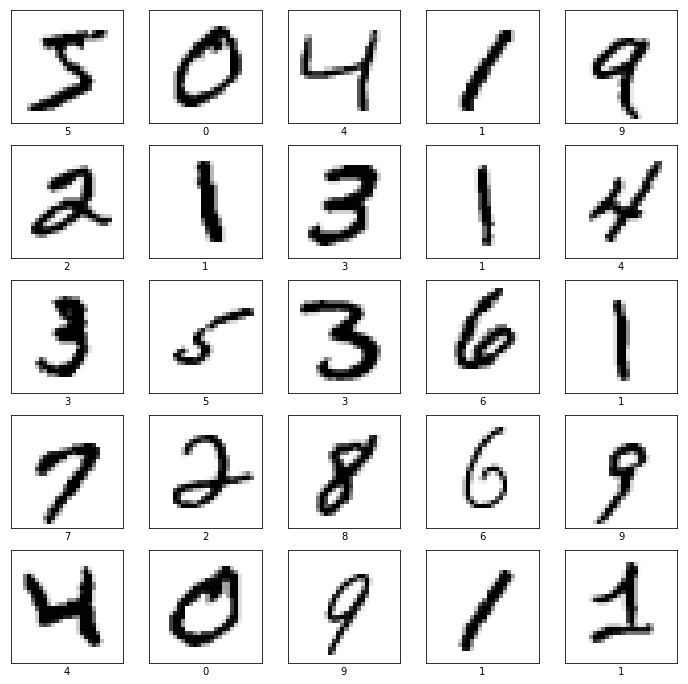

In [21]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
i=0
for e in range(5):
    for t in range(5):
        axes[e][t].imshow(itrain[i].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        axes[e][t].set_xticks([])
        axes[e][t].set_yticks([])
        axes[e][t].set_xlabel(ltrain[i])
        i=i+1
plt.show()

## (b) ii. Plot 15 randomly selected images from the test set without looking at the corresponding labels and try to guess them.  Were all of your guesses correct?

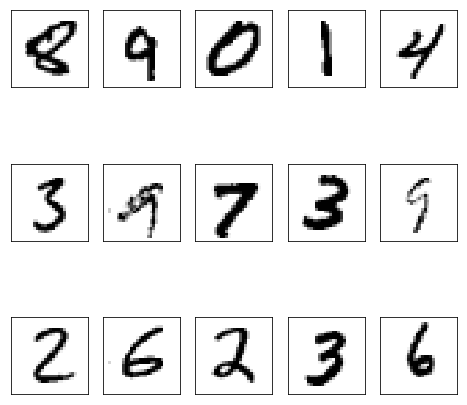

In [25]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8))
 
for e in range(3):
    for t in range(5):
        rand=random.randrange(0, len(ltest))
        axes[e][t].imshow(itest[rand].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        axes[e][t].set_xticks([])
        axes[e][t].set_yticks([])
      
        
plt.show()

    

## (b) iii.  Let us explore the data even more.  Find 2 different digits that look alike.
### Answer:
### 4 and 9 look alike ->  indexes - 2173, 4111, 5639

##  Find 3 samples of the same digit that do not look alike at all.
### 2 -> indexes - 2391, 4876, 3373, 3912, 7249, 924


#  _Classiﬁcation using KNN on MNIST database_ 

## (c) i. What is the nearest neighbor of a train sample, assuming it is included in the training set?

### Answer: Sample itself

In [11]:
#train
nn = NearestNeighbors(n_neighbors=5,metric='euclidean').fit(itrain[:15000])


In [12]:

indices=nn.kneighbors(itest[0:10], return_distance=False)


In [13]:
print(indices)

[[14563 14770 14505  9444  9724]
 [ 1609 12844 11364  2184  5816]
 [12578 11835  6380  1697 14992]
 [ 1877  2327 11791  4356  6357]
 [ 1732   914  7864 11956 11303]
 [ 3468  9815  9312 14154 14980]
 [11145    54 12070  2827 11378]
 [14815 11688  3186  4544  4158]
 [14233 14074  2885  9948 14189]
 [ 5044 13359  3970  9469  2453]]


In [14]:
indices.shape
fig, axes = plt.subplots(5, 10, figsize=(12, 12))


In [15]:
for e in range(5):
    for t in range(10):
        axes[e][t].imshow(itrain[indices[t][e]].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        axes[e][t].set_xticks([])
        axes[e][t].set_yticks([])
 

## (c) ii. Write code for k-nearest neighbors with Euclidean metric (or use a software package). Find 5 nearest neighbors for the ﬁrst 10 test samples and plot them together.

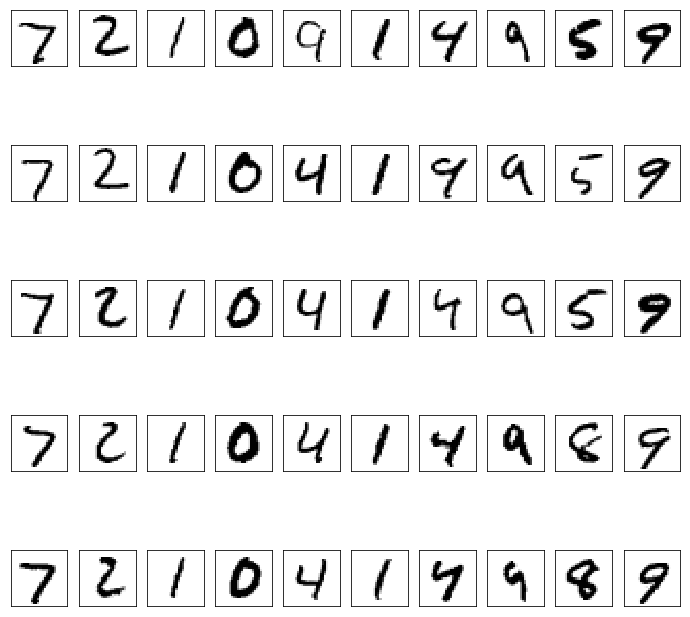

In [16]:
plt.show()

## (c) iii. For K values 1 to 20 record misclassification error 

In [6]:
onebyk=[] 
errortrain=[]
errortest=[] 
for i in range(1,20,1):
    errortest.append(1-KNeighborsClassifier(n_neighbors=i).fit(itrain[:15000], np.asarray(ltrain[:15000])).score(itest[:5000],np.asarray(ltest[:5000])))
    errortrain.append(1-KNeighborsClassifier(n_neighbors=i).fit(itrain[:15000], np.asarray(ltrain[:15000])).score(itrain[:15000],np.asarray(ltrain[:15000])))
    onebyk.append(1/i)

## Plot of misclassification error vs 1/k

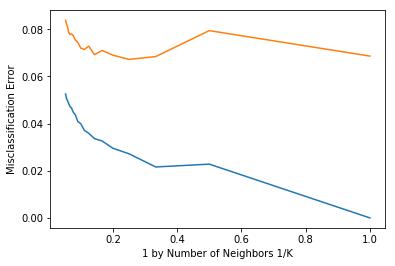

In [7]:
plt.plot( onebyk,errortrain)
plt.plot( onebyk,errortest)
plt.xlabel('1 by Number of Neighbors 1/K')
plt.ylabel('Misclassification Error')
plt.show()

In [48]:
mink=0
for i in range(len(errortest)):
    if errortest[mink]>errortest[i]:
        mink=i
print ("Minimum error is for K value of "+str(mink+1))

Minimum error is for K value of 4


## K* = 4

## (c) iv.  Plot the best error rate, which is obtained by some value of k, against the size of training set

In [ ]:
 N=[]
for i in range (1,1000,200):
        N.append(i)

### N from {1,200,400...1000}

In [51]:
min(onebyk)

0.05263157894736842

In [38]:
besterror=[]
Nvalues=[]
for i in range(5000,20000,1000):
    besterror.append(1-KNeighborsClassifier(n_neighbors=4, metric='euclidean', algorithm='ball_tree').fit(itrain[:i], np.asarray(ltrain[:i])).score(itest[:5000],np.asarray(ltest[:5000])))
    Nvalues.append(i)

# plot misclassification error vs k

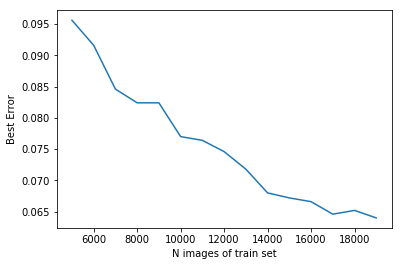

In [39]:
plt.plot( Nvalues,besterror)
plt.xlabel('N images of train set')
plt.ylabel('Best Error')
plt.show()

## (d) Plot the k nearest neighbors of some of misclassiﬁed samples.

In [31]:
count = 0
knc = KNeighborsClassifier(n_neighbors=4).fit(itrain[:15000], np.asarray(ltrain[:15000]))
i=0
misclassified=[]


while (count < 4):
    if ltest[i]!=knc.predict([itest[i]]):
        misclassified.append(itest[i])
        count = count + 1
        i=i+1
    else: i=i+1

nn = NearestNeighbors(n_neighbors=5,metric='euclidean').fit(itrain[:15000])
knindices=nn.kneighbors(misclassified, return_distance=False)




# Print 4 Misclassified samples


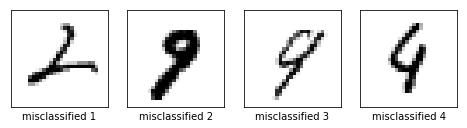

In [76]:
fig, axs = plt.subplots(1, 4, figsize=(8, 8))

for t in range(4):
        axs[t].imshow(misclassified[t].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        axs[t].set_xticks([])
        axs[t].set_yticks([])
        axs[t].set_xlabel("misclassified "+str(t+1))
plt.show()



# Print K(4)Nearest neighbors of misclassified samples

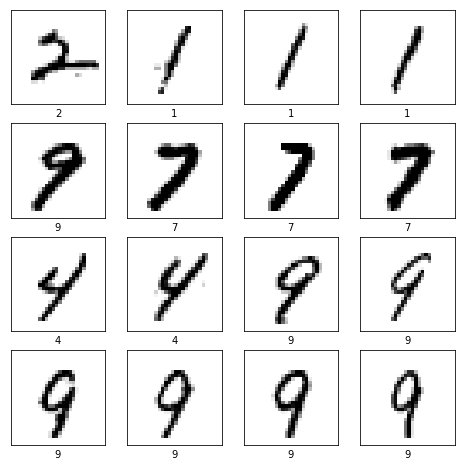

In [78]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for e in range(4):
    for t in range(4):
        axs[e][t].imshow(itrain[knindices[e][t]].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        axs[e][t].set_xticks([])
        axs[e][t].set_yticks([])
        axs[e][t].set_xlabel(ltrain[knindices[e][t]])
plt.show()

## (e) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. 
## i. Minkowski Distances :

## A. which becomes Manhattan Distance with p = 1 

In [30]:
manhatton = 1- KNeighborsClassifier(algorithm='ball_tree',n_neighbors=4,metric='manhattan',p=1).fit(itrain[:15000], np.asarray(ltrain[:15000])).score(itest[:5000],np.asarray(ltest[:5000]))
print (manhatton)

0.084


## B. with log10(p) ∈{0.1,.2,.3,...,1} 

In [46]:
logP=[]
for i in range(1,10,1):
    logP.append(1- KNeighborsClassifier(algorithm='ball_tree',n_neighbors=4,metric='minkowski',p=math.pow(10,i/10)).fit(itrain[:15000], np.asarray(ltrain[:15000])).score(itest[:5000],np.asarray(ltest[:5000])))
print (logP)

[0.076200000000000045, 0.071200000000000041, 0.067200000000000037, 0.06579999999999997, 0.063400000000000012, 0.060799999999999965, 0.056799999999999962, 0.055400000000000005, 0.055000000000000049]


## C. which becomes Chebyshev Distance with p →∞

In [32]:
cheby = 1- KNeighborsClassifier(algorithm='ball_tree',n_neighbors=4,metric='chebyshev').fit(itrain[:15000], np.asarray(ltrain[:15000])).score(itest[:5000],np.asarray(ltest[:5000]))
print (cheby)

0.3006


## ii. Mahalanobis Distance 

In [17]:
mahalanobis = 1- KNeighborsClassifier(algorithm='brute',metric_params={'VI':np.linalg.pinv(np.cov(np.array(itrain[:5000])))},n_neighbors=4,metric='mahalanobis').fit(itrain[:5000], np.asarray(ltrain[:5000])).score(itest[:500],np.asarray(ltest[:500]))

In [14]:
print(mahalanobis)

0.81


## (f) Replace the majority polling decision with another reasonable method devised by yourself. Use it with Euclidean, Manhattan, and Chebyshev distances and report the best test errors.

### Answer: Instead of majority polling we can classify based on distance weight

In [13]:
dist_euc = 1-KNeighborsClassifier(weights='distance',algorithm='ball_tree',n_neighbors=4, metric='euclidean').fit(itrain[:15000], np.asarray(ltrain[:15000])).score(itest[:5000],np.asarray(ltest[:5000]))
print('error with distance weighted euclidean :')
print(dist_euc)
dist_man = 1- KNeighborsClassifier(weights='distance',algorithm='ball_tree',n_neighbors=4,metric='manhattan',p=1).fit(itrain[:15000], np.asarray(ltrain[:15000])).score(itest[:5000],np.asarray(ltest[:5000]))
print('error with distance weighted manhattan :')
print (dist_man)
dist_cheby = 1- KNeighborsClassifier(weights='distance',algorithm='ball_tree',n_neighbors=4,metric='chebyshev').fit(itrain[:15000], np.asarray(ltrain[:15000])).score(itest[:5000],np.asarray(ltest[:5000]))
print('error with distance weighted chebyshev :')
print (dist_cheby)

error with distance weighted euclidean :
0.0608
error with distance weighted manhattan :
0.0752
error with distance weighted chebyshev :
0.2808


## (g) What is the lowest error rate you achieved in this exercise?

### Answer: 0.055 (For my subset of training set and test set)